# NSL-KDD Part 1: Exploration and Unsupervised Learning

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing as p
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import pairwise_distances 
import numpy as np

In [54]:
# assigning field names 
datacols = (['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted'
,'num_root','num_file_creations','num_shells','num_access_files','num_outbound_cmds','is_host_login','is_guest_login','count','srv_count','serror_rate','srv_serror_rate','rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate'
,'srv_diff_host_rate','dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate',
'dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','security_status','level'])

#load training dataset  
nslkdd = pd.read_table(r"C:\Users\Sunishka\Desktop\KDDTrain+.txt",sep=",", names=datacols)
nslkdd=nslkdd.iloc[:,:-1] #dropping  unecessary feature 'Level' 
nslkdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,security_status
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


This dataset is popularly used for machine-learning students to practice modelling network-intrusion detection systems. 

It has 42 features that can be used to predict the 'security_status' feature of a particular instance of incoming network traffic

In [3]:
nslkdd['security_status'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

##### simplifying the target variable
- all values that are not classified as 'normal' will be classified as an 'attack' action on the network, making this a binary-classification problem.

In [4]:
nslkdd.loc[nslkdd['security_status'] == "normal", "security_status"] = 'normal'
nslkdd.loc[nslkdd['security_status'] != 'normal', "security_status"] = 'attack'
nslkdd.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,security_status
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,attack
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [5]:
nslkdd.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


from the initial description, we can infer that the dataset is not normally distributed and might require a lot of pre-processing.

## Exploratory Data Analysis + Notes

In [6]:
nslkdd['security_status'].value_counts()

security_status
normal    67343
attack    58630
Name: count, dtype: int64

- the dataset has a balanced distribution of 'normal' and 'attack' instances.

<Axes: xlabel='protocol_type', ylabel='count'>

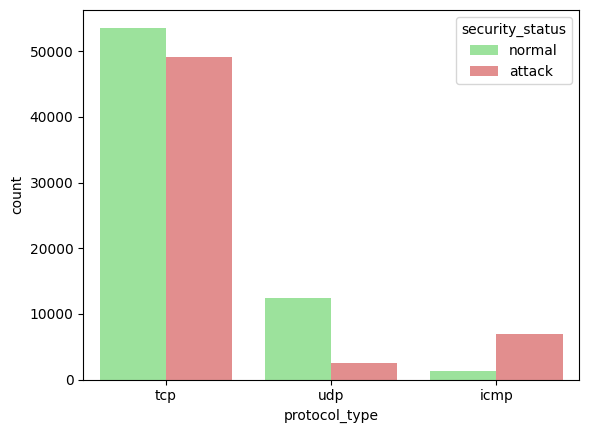

In [7]:
#checking the distribution of protocol type of security alerts
sns.countplot(data=nslkdd, x='protocol_type', hue='security_status', palette = {'attack':'lightcoral','normal':'lightgreen'})

- ICMP seems to be an unsecure protocol, whereas UDP seems to be a secure protocol. 
- TCP protocol seems to allow both secure and unsecure network activity. 

<function matplotlib.pyplot.show(close=None, block=None)>

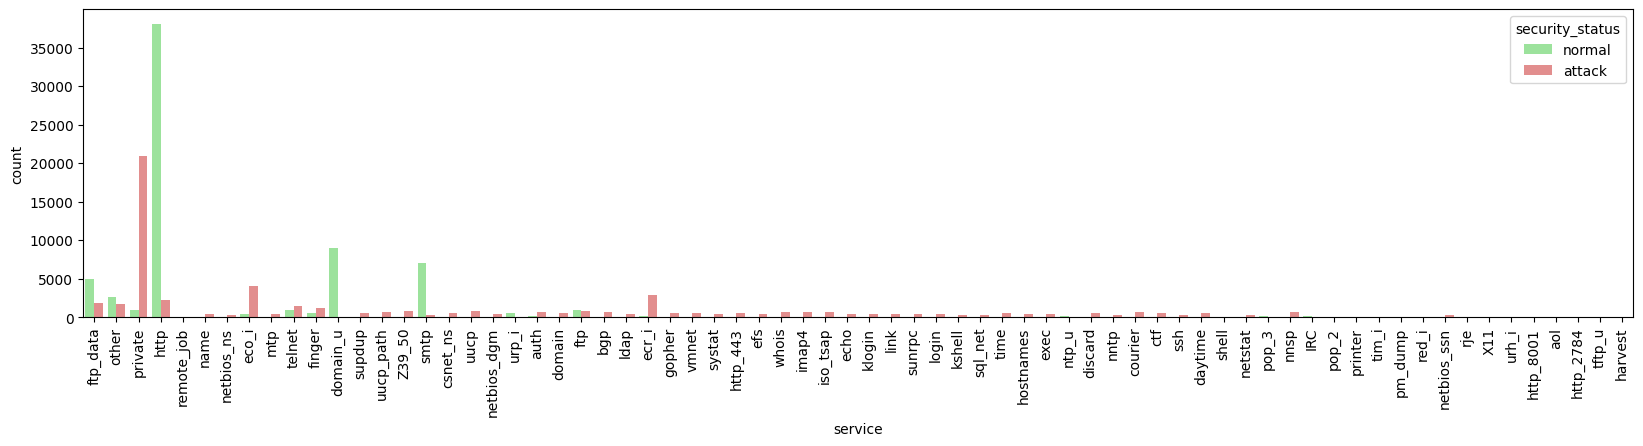

In [8]:
#checking the distribution of service type of security alerts
f,ax=plt.subplots(figsize=(20,4))
sns.countplot(data=nslkdd, x='service',hue='security_status',palette={'attack':'lightcoral','normal':'lightgreen'})
plt.xticks(rotation=90)
plt.show

 HTTP and domain_u seem to be the most secure service type, whereas private, eco_i, telnet and pop_3 seem to have relatively high instances of unsafe network connections

<function matplotlib.pyplot.show(close=None, block=None)>

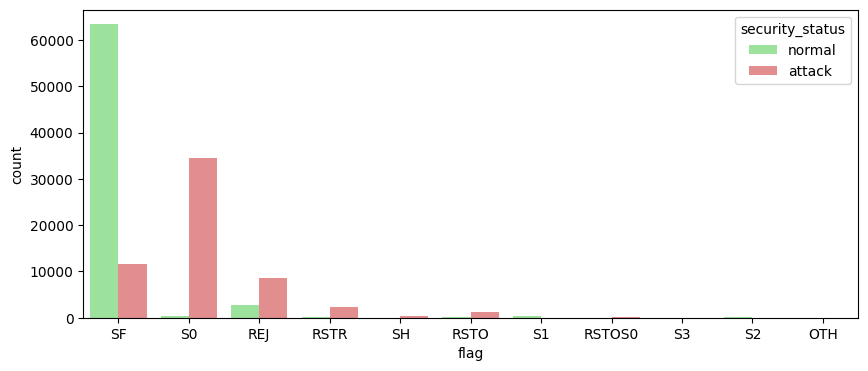

In [9]:
f,ax=plt.subplots(figsize=(10,4))
sns.countplot(data=nslkdd, x='flag',hue='security_status',palette={'attack':'lightcoral','normal':'lightgreen'})
plt.show

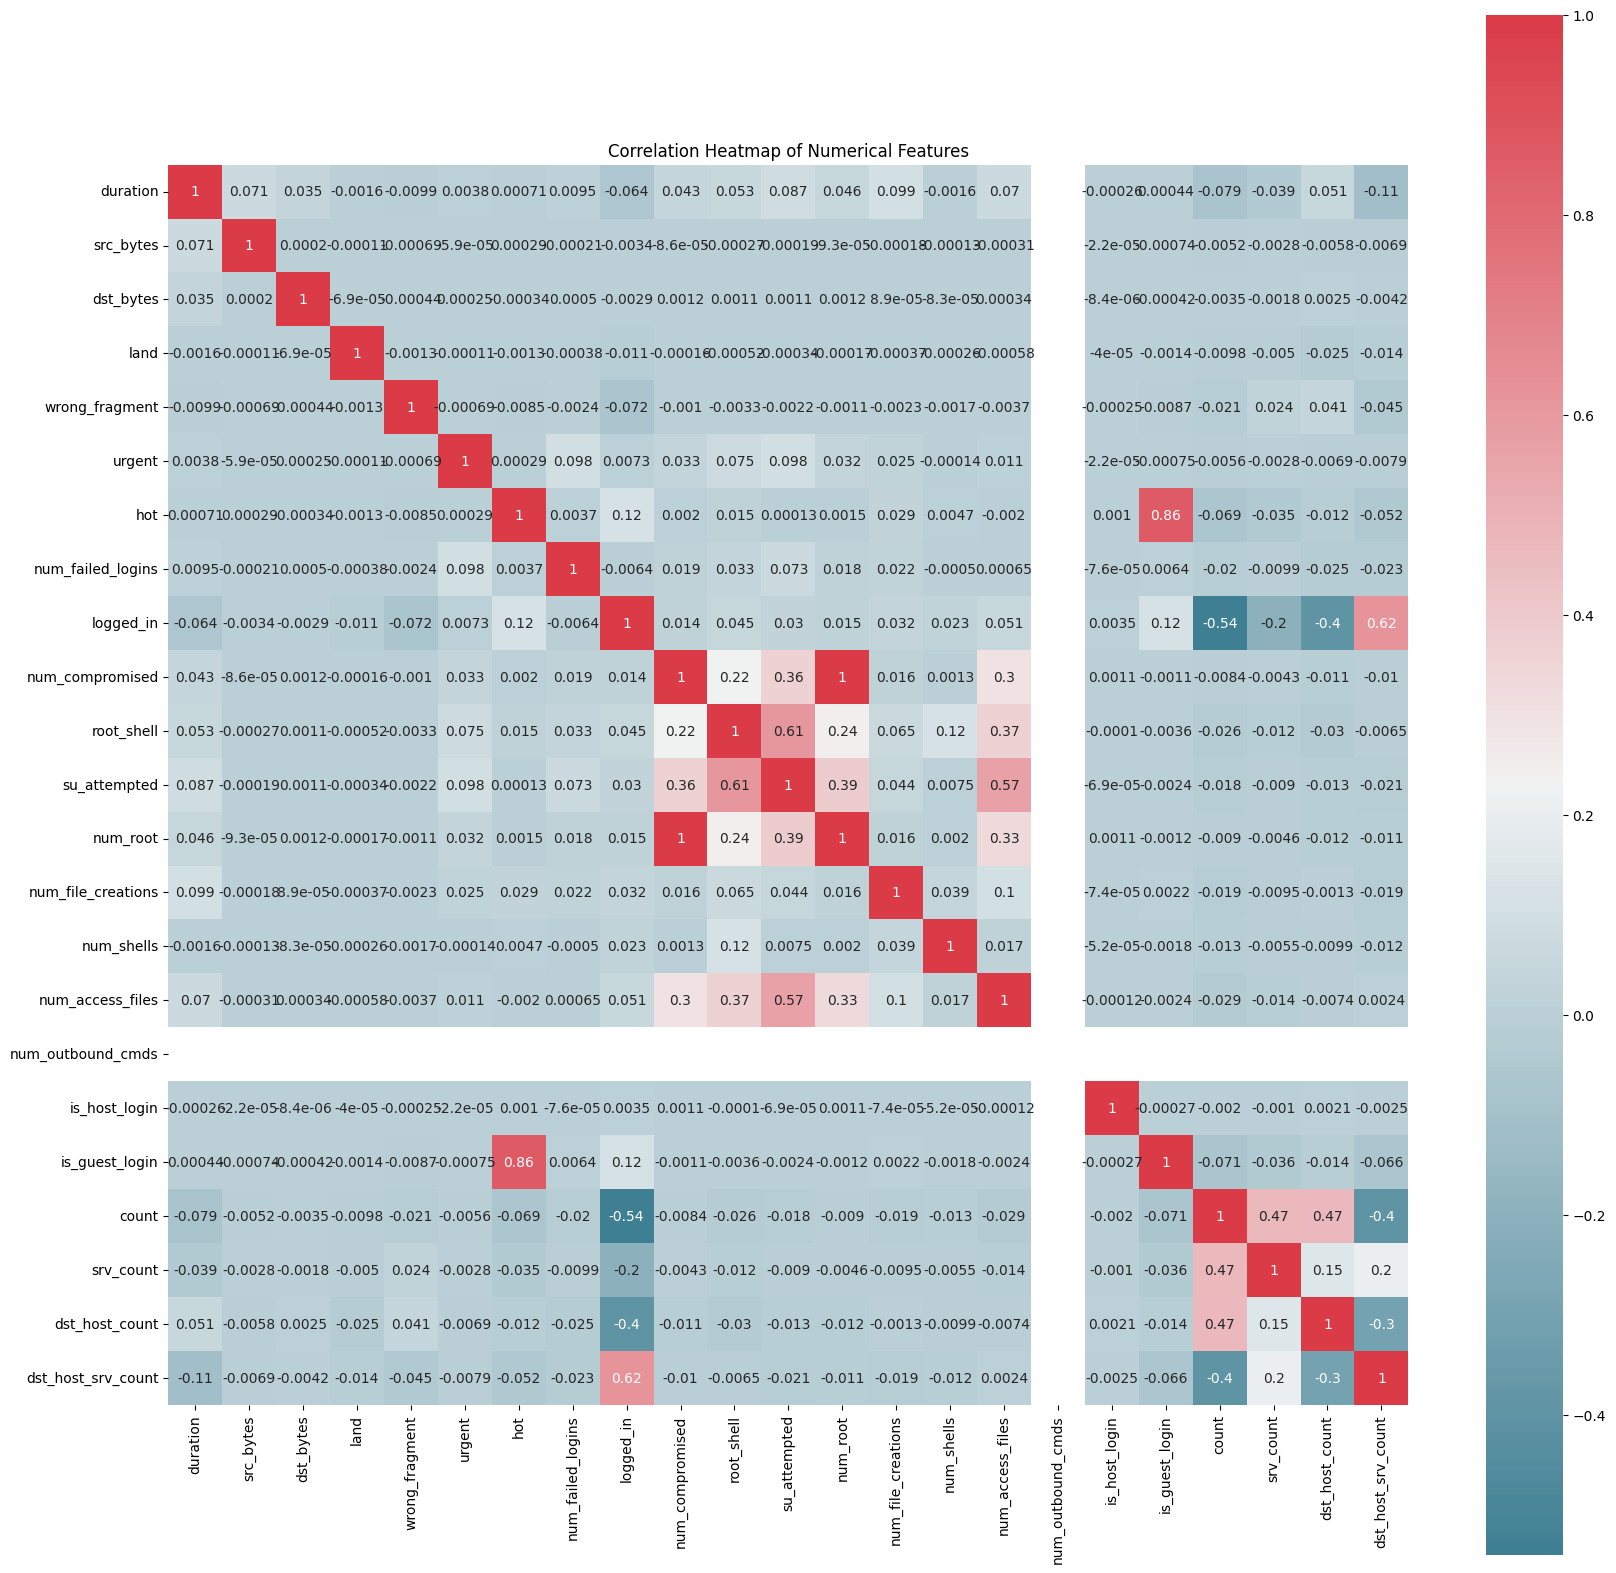

In [10]:
# Selecting only the numerical columns
numeric_nslkdd = nslkdd.select_dtypes(include=['int64'])  # This will select all columns with numerical data

# Calculate the correlation matrix
correlation_matrix = numeric_nslkdd.corr()

# Generate a heatmap using Seaborn
f,ax=plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

certain variables have very high collinearity and one of the two collinear pairs will have to be removed for model accuracy. 

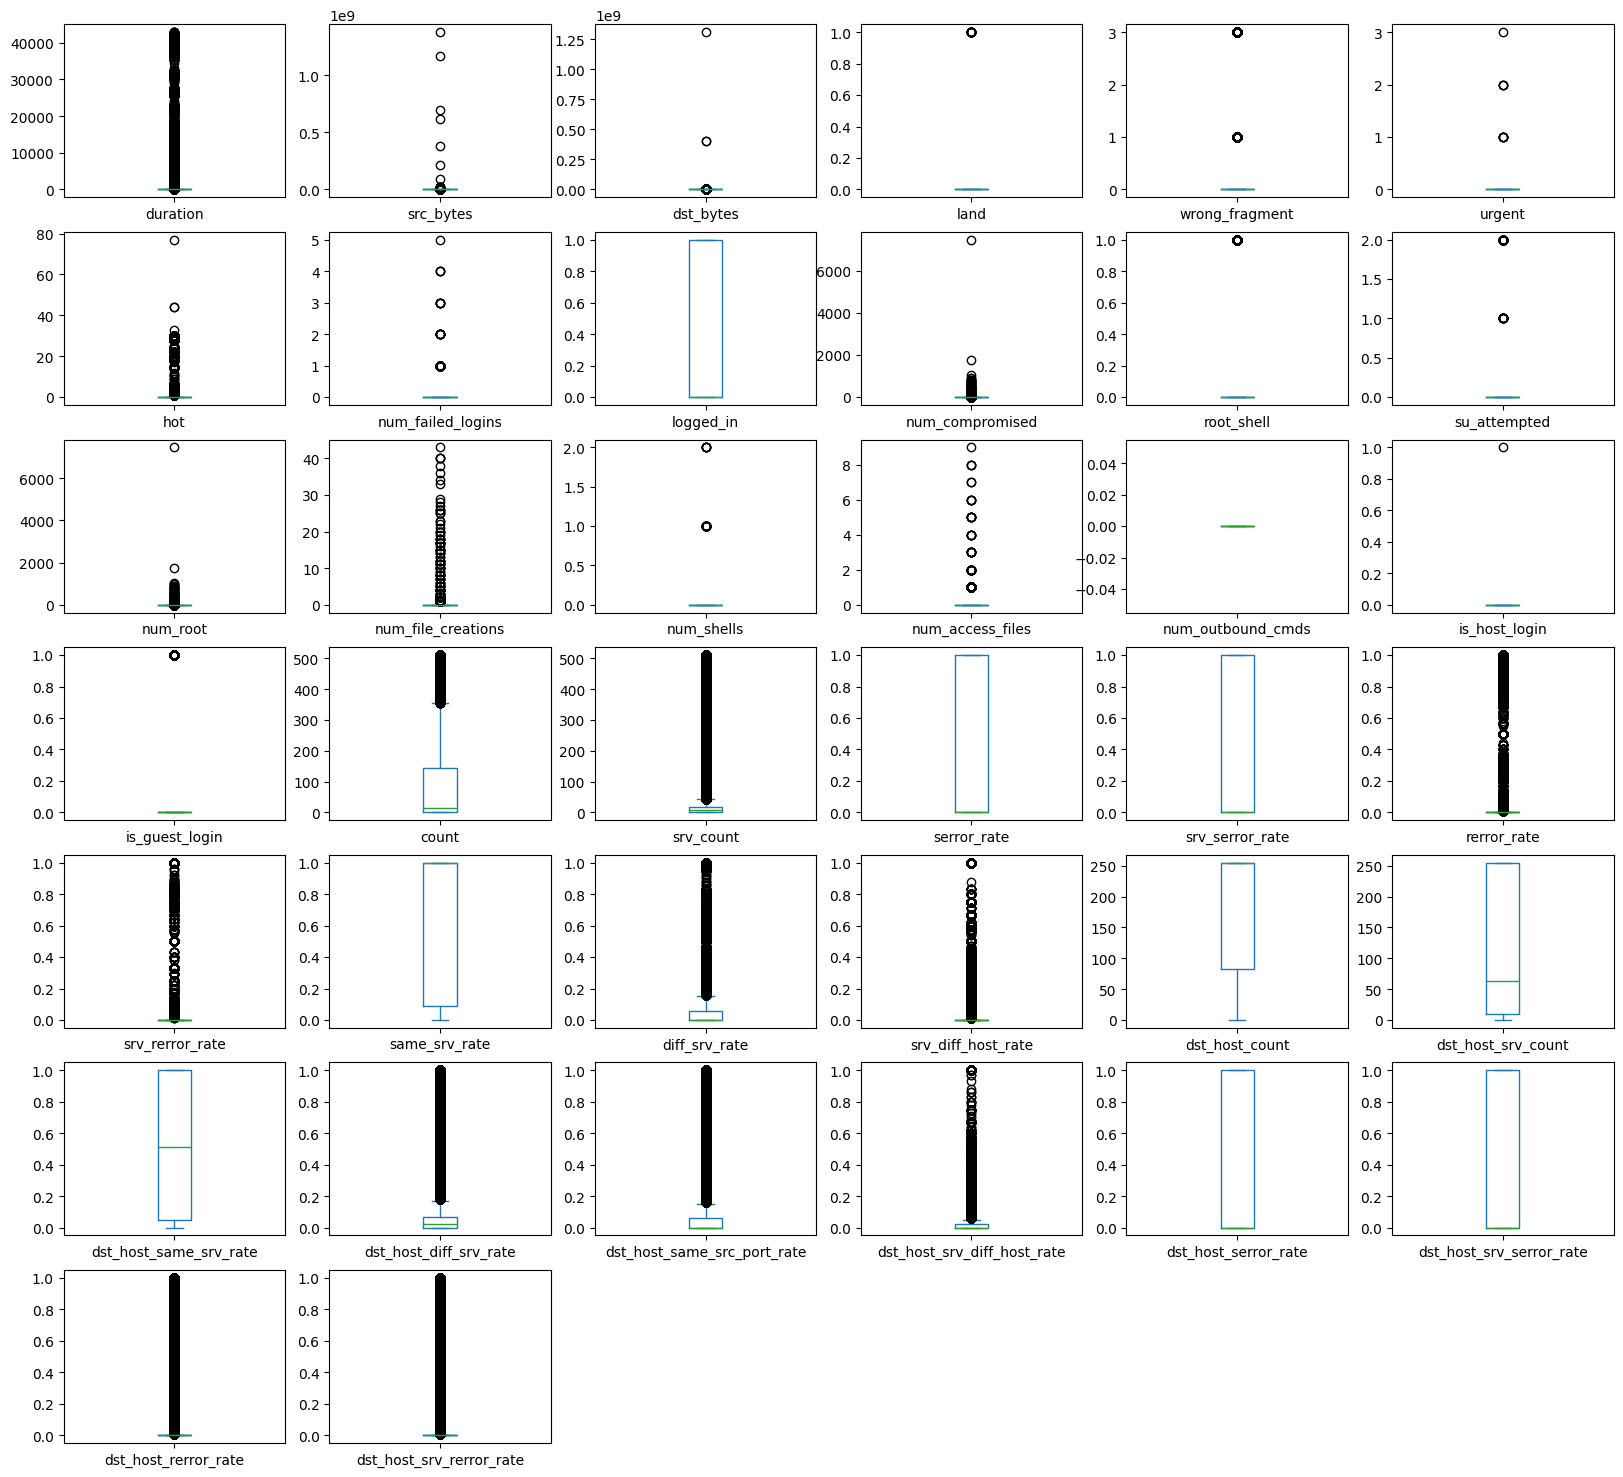

In [11]:
nslkdd.plot(kind = 'box', subplots = True, layout = (15, 6), sharex = False, sharey = False, figsize = (20, 40));

Several variables do not follow a normal distribution and are ridden with outlier data points. This dataset will require normalization.

##### Normalizing + One-Hot Encoding for Clustering 

In [12]:
nslkdd_categorical=nslkdd[['protocol_type','service','flag']]
nslkdd_labels=nslkdd['security_status']
nslkdd_numerical=nslkdd.drop(['protocol_type','service','flag','security_status'], axis=1)

minmax=MinMaxScaler()
nslkdd_norm=minmax.fit_transform(nslkdd_numerical)
kdd_norm_df=pd.DataFrame(nslkdd_norm, columns=nslkdd_numerical.columns)
kdd_norm_df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.588235,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.117647,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.000000,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [13]:
kdd_encoded=pd.get_dummies(nslkdd_categorical)
kdd_encode_df=pd.DataFrame(kdd_encoded)
kdd_encode_df.head()

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [14]:
#Joining the encoded df with the normalized df 
kdd_merged=pd.concat([kdd_norm_df, kdd_encode_df], axis=1)
kdd_merged.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,True,False


one-hot encoding three important multi-categorical variables has increased the dimension of our dataset by several columns. 

### Dimensionality Reduction


#1: Reducing by Feature Importance

Top 122 important features:
                        Feature  Importance
25                same_srv_rate    0.103562
26                diff_srv_rate    0.095998
30       dst_host_same_srv_rate    0.086531
29           dst_host_srv_count    0.073614
8                     logged_in    0.071664
32  dst_host_same_src_port_rate    0.064477
31       dst_host_diff_srv_rate    0.057404
35     dst_host_srv_serror_rate    0.057094
33  dst_host_srv_diff_host_rate    0.042359
21                  serror_rate    0.039862
19                        count    0.038371
28               dst_host_count    0.035592
22              srv_serror_rate    0.032420
36         dst_host_rerror_rate    0.032147
20                    srv_count    0.025360
37     dst_host_srv_rerror_rate    0.025178
34         dst_host_serror_rate    0.021129
1                     src_bytes    0.018883
24              srv_rerror_rate    0.015796
23                  rerror_rate    0.012847
27           srv_diff_host_rate    0.011056
6   

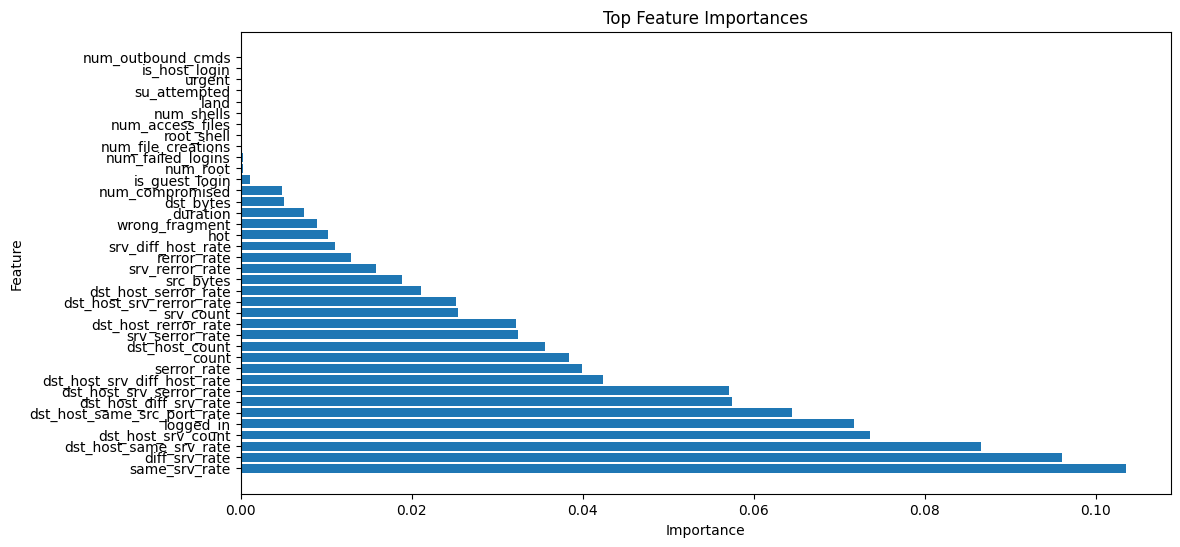

In [15]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Separate features and target variable
X = kdd_norm_df
y = nslkdd_labels

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N important features
top_n = 122 
print(f"Top {top_n} important features:")
print(feature_importance_df.head(top_n))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Feature Importances')
plt.show()

In [16]:
#dropping the least important numerical features from our merged dataset 
kdd_merged=kdd_merged.drop(['is_guest_login','num_root','num_failed_logins','num_file_creations','root_shell','num_access_files','num_shells','land','su_attempted','urgent','is_host_login','num_outbound_cmds'],axis=1)
kdd_merged.head() 

,duration,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,count,srv_count,serror_rate,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,3.558064e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.003914,0.003914,0.0,...,False,False,False,False,False,False,False,False,True,False
1,0.0,1.057999e-07,0.000000e+00,0.0,0.0,0.0,0.0,0.025440,0.001957,0.0,...,False,False,False,False,False,False,False,False,True,False
2,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.240705,0.011742,1.0,...,False,False,False,False,True,False,False,False,False,False
3,0.0,1.681203e-07,6.223962e-06,0.0,0.0,1.0,0.0,0.009785,0.009785,0.2,...,False,False,False,False,False,False,False,False,True,False
4,0.0,1.442067e-07,3.206260e-07,0.0,0.0,1.0,0.0,0.058708,0.062622,0.0,...,False,False,False,False,False,False,False,False,True,False


we have managed to reduce 12 columns, but the data set is still high-dimensional and will lead to slow model performance, unless reduced further. However, in order to not lose out on feature relationships, the dataset will undergo PCA. 

##### #2 - 2D PCA with K-Means

In [17]:
y_check1 = y.map({'attack': 0, 'normal': 1})
y_check2 = y.map({'attack': 1, 'normal': 0})

from sklearn.decomposition import PCA 

kdd_2d = PCA(n_components=2).fit_transform(kdd_merged)

kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=3).fit(kdd_2d)
wcss_pca = kmeans_pca.inertia_
print("Within-cluster sum of squares =", wcss_pca)

f1_scores = (f1_score(y_check1, kmeans_pca.labels_), f1_score(y_check2, kmeans_pca.labels_))
legend_label_set = 0 if f1_scores[0] > f1_scores[1] else 1

print("F1 scores=", max(f1_scores))


Within-cluster sum of squares = 107089.46999313425
F1 scores= 0.8491936196814892


Text(0.5, 1.0, 'Cluster Labels')

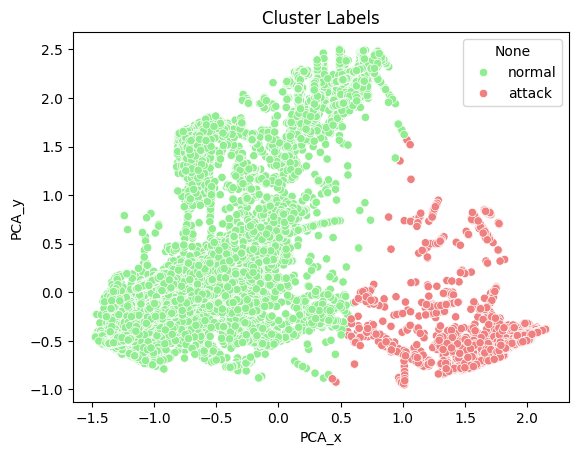

In [18]:
kdd_2d = pd.DataFrame(kdd_2d, columns=['PCA_x', 'PCA_y'])
cluster_labels_pca = pd.Series(["attack" if x == legend_label_set else "normal" for x in kmeans_pca.labels_])

sns.scatterplot(x='PCA_x', y='PCA_y', data=kdd_2d, hue=cluster_labels_pca, palette={"attack": "lightcoral", "normal": "lightgreen"})
plt.title('Cluster Labels')

Text(0.5, 1.0, 'True Labels')

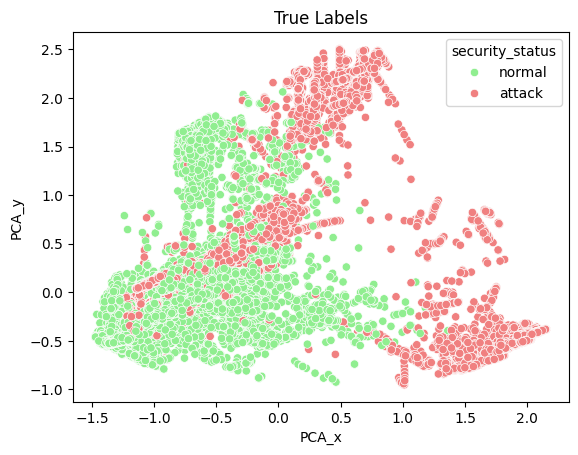

In [19]:
sns.scatterplot(x='PCA_x', y='PCA_y', data=kdd_2d, hue=nslkdd_labels, palette={"attack": "lightcoral", "normal": "lightgreen"})
plt.title('True Labels')

In [20]:
from sklearn.metrics import silhouette_score
score = silhouette_score(kdd_2d, cluster_labels_pca, metric='euclidean')
print("Silhouette score = {}".format(score))

Silhouette score = 0.7049319684730994


the WSS is very high for this dataset, but the silhouette score indicates that the 2D k-means clustering is optimistically distinct. However, by comparing the kmeans labelled plot to the true plot, we can see that the actual data has a lot of overlap between the originally classified data points. 

### 3D PCA with K-Means

In [21]:
kdd_3d = PCA(n_components=3).fit_transform(kdd_merged)

kmeans_pca = KMeans(n_clusters=2, n_init='auto', random_state=3).fit(kdd_3d)
wcss_pca = kmeans_pca.inertia_
print("Within-cluster sum of squares =", wcss_pca)

f1_scores = (f1_score(y_check1, kmeans_pca.labels_), f1_score(y_check2, kmeans_pca.labels_))
legend_label_set = 0 if f1_scores[0] > f1_scores[1] else 1

print("F1 scores=", max(f1_scores))


Within-cluster sum of squares = 168268.96258524412
F1 scores= 0.9172368493075702


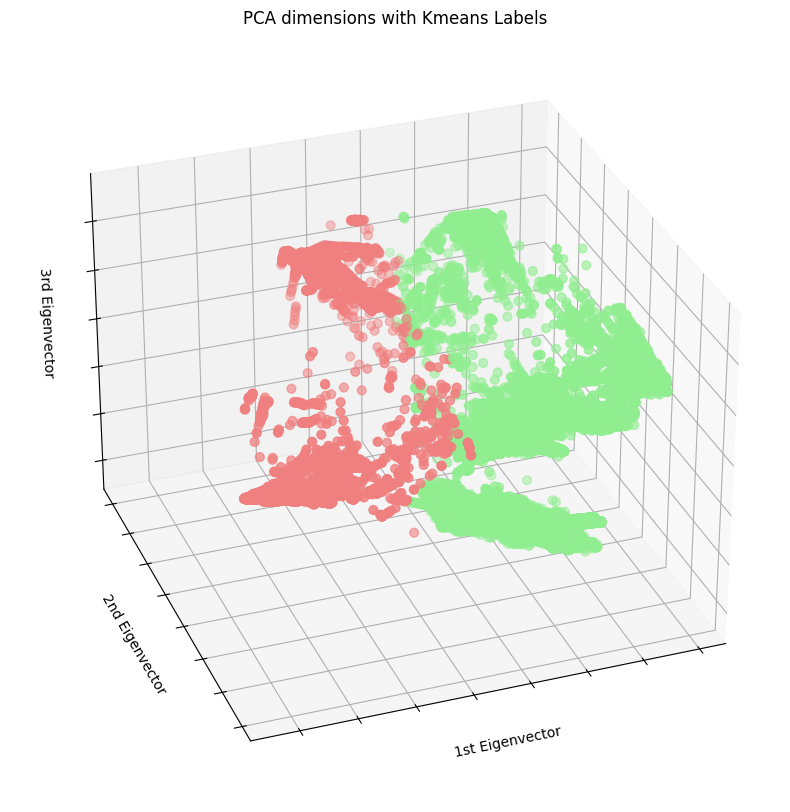

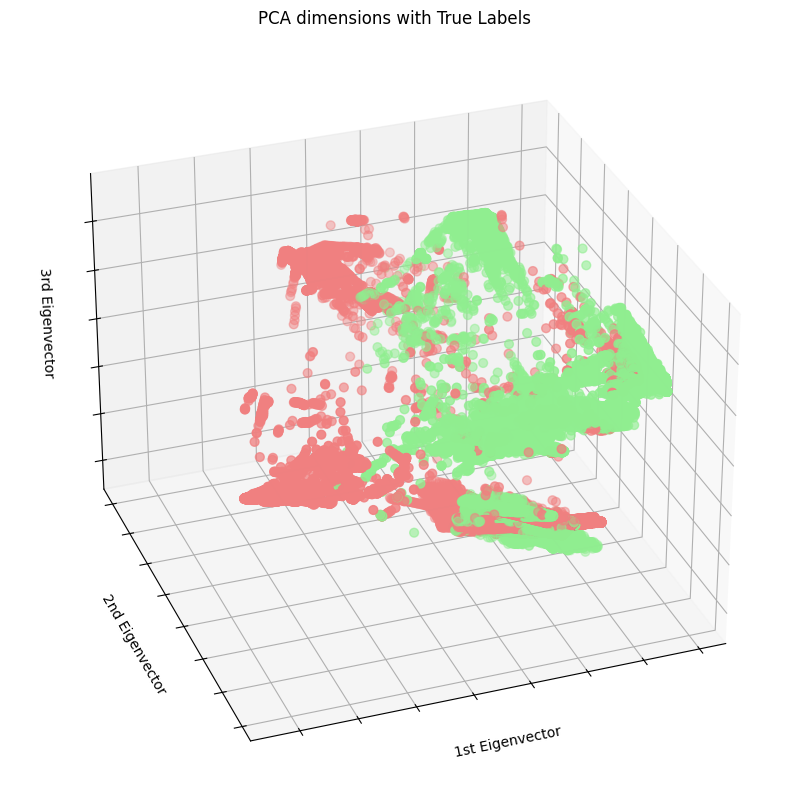

In [22]:
#Visualizing with Cluster Labels 
kdd_3d = pd.DataFrame(kdd_3d, columns=['PCA_x', 'PCA_y', 'PCA_z'])
cluster_labels_3d = pd.Series(["attack" if x == legend_label_set else "normal" for x in kmeans_pca.labels_], dtype='category')
kdd_3d['security_status'] = cluster_labels_3d
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    xs='PCA_x',
    ys='PCA_y',
    zs='PCA_z',
    c=kdd_3d['security_status'].map({"attack": "lightcoral", "normal": "lightgreen"}),
    s=40,
    data=kdd_3d,
)
ax.set_title("PCA dimensions with Kmeans Labels")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()

#Visualizing with True Lavels
kdd_3d = pd.DataFrame(kdd_3d, columns=['PCA_x', 'PCA_y', 'PCA_z'])
cluster_labels_pca = pd.Series(["attack" if x == legend_label_set else "normal" for x in kmeans_pca.labels_], dtype='category')
kdd_3d['security_status'] = nslkdd['security_status']
fig = plt.figure(1, figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
ax.scatter(
    xs='PCA_x',
    ys='PCA_y',
    zs='PCA_z',
    c=kdd_3d['security_status'].map({"attack": "lightcoral", "normal": "lightgreen"}),
    s=40,
    data=kdd_3d,
)
ax.set_title("PCA dimensions with True Labels")
ax.set_xlabel("1st Eigenvector")
ax.xaxis.set_ticklabels([])
ax.set_ylabel("2nd Eigenvector")
ax.yaxis.set_ticklabels([])
ax.set_zlabel("3rd Eigenvector")
ax.zaxis.set_ticklabels([])
plt.show()

In [23]:
kdd_3d=kdd_3d.drop(['security_status'], axis=1)
score = silhouette_score(kdd_3d, cluster_labels_3d, metric='euclidean')
print("Silhouette score = {}".format(score))

Silhouette score = 0.5909498805501144


the WSS is a lot higher and the silhouette score is lower in the k-means clustering of the 3D data, however we can see a geometrically complex pattern in the dataset, which is to some degree, being distinguished and clustered at a moderate level by k-means. However, the algorithm is not able to overcome the issue of true datapoint classes overlapping with each other. 

### Hierarchical Clustering with 3D PCA

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from sklearn.cluster import AgglomerativeClustering 
#to counter the long-running time, we are taking 10% of the data
sample_3d= kdd_3d.sample(frac=0.1, random_state=42) 

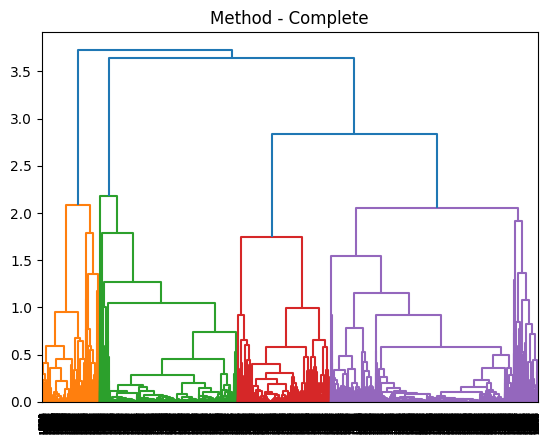

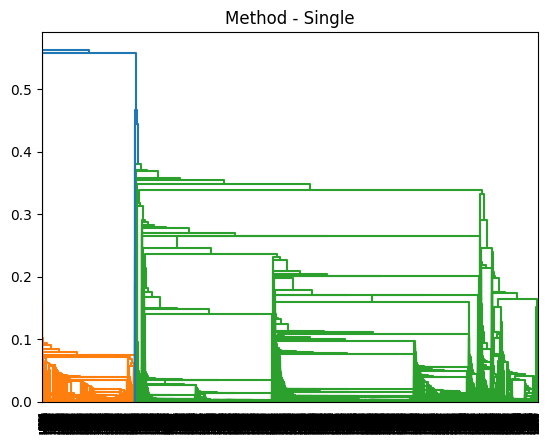

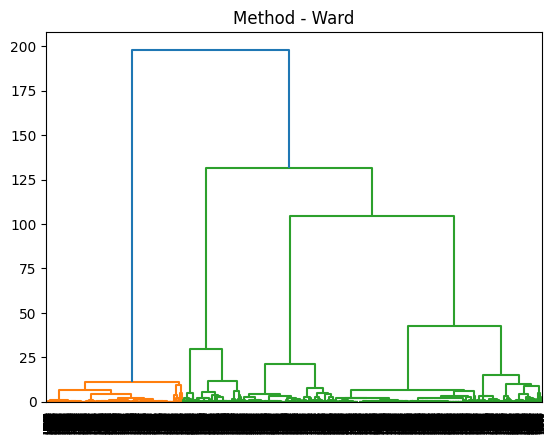

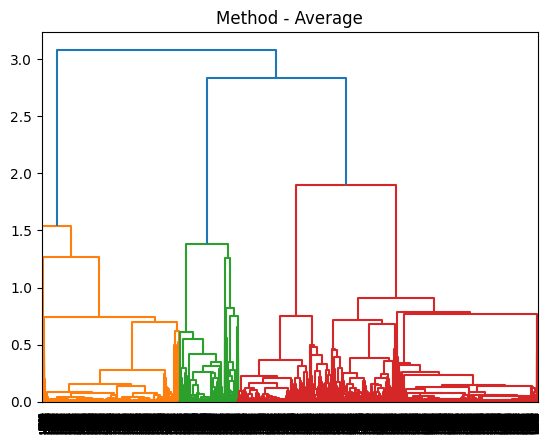

In [27]:

# Plotting the dendrogram
linkage_data = linkage(sample_3d, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Complete')
plt.show()

linkage_data = linkage(sample_3d, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Single')
plt.show()


linkage_data = linkage(sample_3d, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Ward')
plt.show()


linkage_data = linkage(sample_3d, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Average')
plt.show()


- The ward and single linkages intuitively suggest a two-cluster classification, however we can confirm that this clustering is not accurate because the two hierarchical clusters are highly imbalanced, whereas our original dataset has a relatively balanced number of our target variable values. 
- Average linkage suggests a 3-cluster dendrogram
- Complete linkage gives a very distinct 4-cluster dendrogram with well-differentiated nodes. 

In [55]:
#evaluating the best linkage: complete

hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(sample_3d)
print(labels) # use np.count_nonzero(labels==0)
#h_clust = hierarchical_cluster.fit(nano)

h_cluster_id = cut_tree(linkage_data, n_clusters=4).reshape(-1, ) #taking suggested clusters from the dendrogram
h_cluster_id

# Cluster quality using silhouette
score = silhouette_score(sample_3d, labels, metric='euclidean')
print("Silhouette score = {}".format(score))


[3 0 0 ... 2 2 0]
Silhouette score = 0.7785259101710167


This hierarchical model has a relatively good silhouette score compared to the previous k-means clustering. The dataset can possibly be clustered with both binary and multi-classification groups. 

### Hierarchical Clustering with 2D PCA

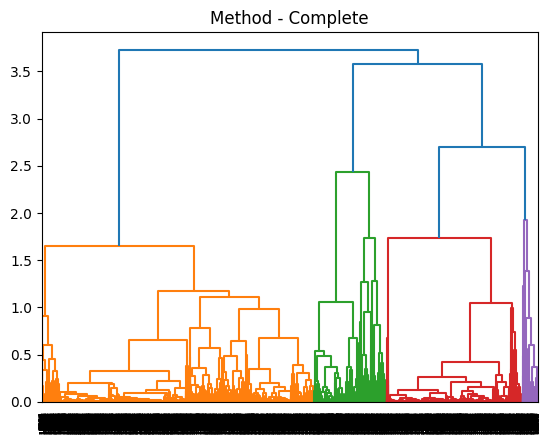

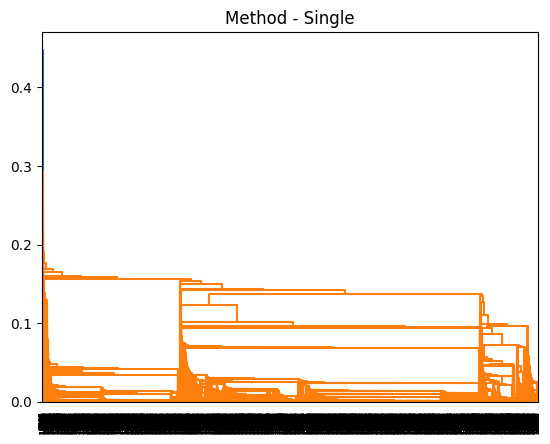

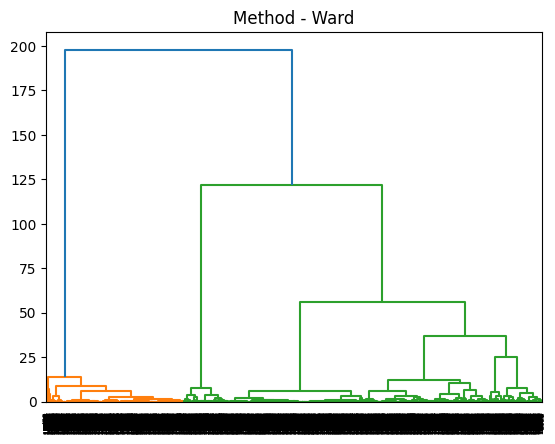

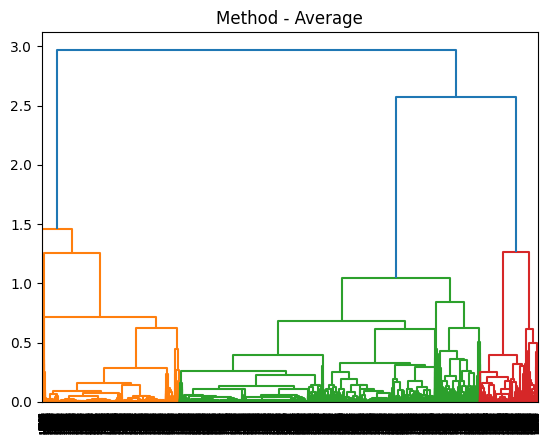

In [29]:
sample_2d= kdd_2d.sample(frac=0.1, random_state=42) 

# Plotting the dendrogram
linkage_data = linkage(sample_2d, method='complete', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Complete')
plt.show()

linkage_data = linkage(sample_2d, method='single', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Single')
plt.show()


linkage_data = linkage(sample_2d, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Ward')
plt.show()


linkage_data = linkage(sample_2d, method='average', metric='euclidean')
dendrogram(linkage_data)
plt.title('Method - Average')
plt.show()

choosing the method with the most distinct clustering for evaluation

In [30]:
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='complete')
labels = hierarchical_cluster.fit_predict(sample_2d)
print(labels) # use np.count_nonzero(labels==0)
#h_clust = hierarchical_cluster.fit(nano)

h_cluster_id = cut_tree(linkage_data, n_clusters=4).reshape(-1, )
h_cluster_id

# Cluster quality using silhouette
score = silhouette_score(sample_2d, labels, metric='euclidean')
print("Silhouette score = {}".format(score))

[3 1 1 ... 2 3 1]
Silhouette score = 0.5698647862972384


from the silhuoette scores of Kmeans and Hierarchical clustering, it is deduced that 3D-PCA is more appropriate for distinct clustering. 

### Insights from Hierarchical Clustering

 The NSL-KDD dataset can be classified as a binary classification dataset (attack vs normal security status) or as a multi-classification dataset. This because the vast variations of attacks can also be condensed and classified into four types of network intrusion. 

- **DoS** : denial of service attacks 
- **R2L** : root to local attacks
- **Probe** : probing attacks
- **U2R** : user to root attacks 

*referenced from: https://prosiding.stis.ac.id/index.php/semnasoffstat/article/download/1138/381/#:~:text=Not%20only%20that%20network%20traffic,%5B4%5D%5B5%5D*

- For the purpose of this project, the binary classification has been used as the target variable,
- However the security_status variable has popularly been clustered as five variables as well, one of them being normal and the other four being these listed attack types. 
- The clear clustering in the complete-linkage hierarchical dendrograms above may indicate that the clustering algorithm is intuitively categorizing majority 3 out of 4 of the attack types, and the normal network instances as another distinct cluster

##### **Revisiting the Original Dataset as multi-classification of security_status to compare with Hierarchical clustering**

In [31]:
def change_label(df):
  df.security_status.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.security_status.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)      
  df.security_status.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.security_status.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)
  
nslkdd_copy = pd.read_table(r"C:\Users\Sunishka\Desktop\KDDTrain+.txt",sep=",", names=datacols)
change_label(nslkdd_copy)

nslkdd_copy['security_status'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

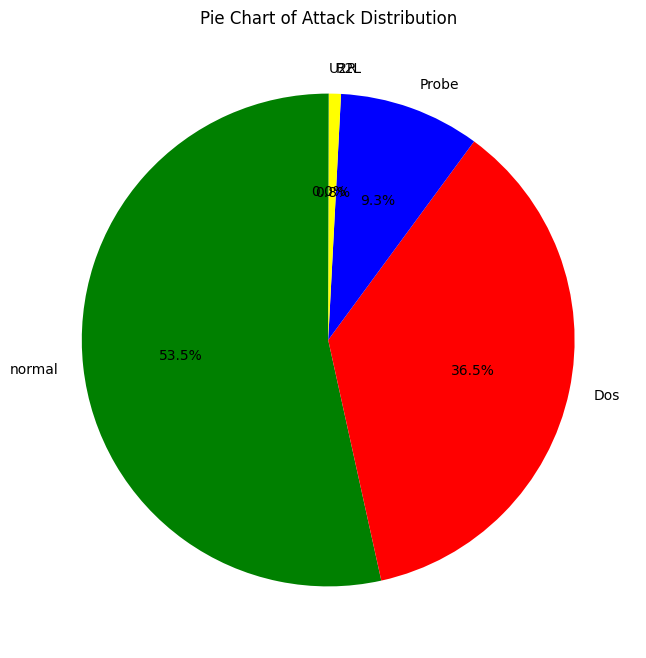

In [32]:
# Get value counts for 'security_status'
counts = nslkdd_copy['security_status'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'blue', 'yellow'])
plt.title('Pie Chart of Attack Distribution')
plt.show()

this original multi-classification of security_status is what we are hypothesizing that hierarchical clustering is probably picking up on. The model can clearly cluster four out of these five statuses; it can be assumed that U2R is probably not a clear cluster because of it's minimal distribution in the dataset and is not showing up in dendrograms. 

# NSLKDD Part 2: Supervised Learning

After several attempts with the following models, kdd_3d (the 3D PCA version of the dataset) seems to be giving more realistic accuracies compared to the original 110 features of kdd_merged (most of the models have overfitted with the original dataset in past attempts, and SVM has an indefinite running time). 

- Hence kdd_3D is being used for the supervised learning models below

In [33]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


X_train, X_test, y_train, y_test = train_test_split(kdd_3d, nslkdd_labels, test_size = 0.20, random_state = 23)

#### Decision Tree

In [34]:
DTclassifier = DecisionTreeClassifier(max_depth=4, random_state=23)
DTmodel = DTclassifier.fit(X_train, y_train)
DTpreds = DTmodel.predict(X_test)
print("Accuracy Decision Tree:", accuracy_score(y_test, DTpreds) *100)

Accuracy Decision Tree: 95.68168287358603


#### K-Nearest Neighbour

In [35]:
KNNclassifier = KNeighborsClassifier(n_neighbors=5) 
KNNmodel = KNNclassifier.fit(X_train, y_train)
KNNpreds = KNNmodel.predict(X_test)
print("Accuracy KNN:", accuracy_score(y_test, KNNpreds) *100)

Accuracy KNN: 99.05536812859694


#### Linear Discriminant Analysis

In [36]:
LDAmodel = LinearDiscriminantAnalysis()  
LDAmodel.fit(X_train, y_train)    
LDApreds = LDAmodel.predict(X_test)    
print("Accuracy Linear DA:", accuracy_score(y_test, LDApreds) *100)    

Accuracy Linear DA: 89.52173050208376


#### Quadratic Discriminant Analysis

In [37]:
QDAmodel = QuadraticDiscriminantAnalysis()
QDAmodel.fit(X_train, y_train)
QDApreds = QDAmodel.predict(X_test)
print("Accuracy Quadratic DA:", accuracy_score(y_test, QDApreds) *100)

Accuracy Quadratic DA: 88.08493748759675


#### Support Vector Machines

In [38]:
SVM_model = SVC(kernel='linear')
SVM_model.fit(X_train, y_train) 
SVMpreds = SVM_model.predict(X_test)
print("Accuracy SVM:", accuracy_score(y_test, SVMpreds) *100)

Accuracy SVM: 89.7955943639611


#### Ridge Classifier

Accuracy RIDGE Classifier: 89.51776146060726
0.8974577784833991


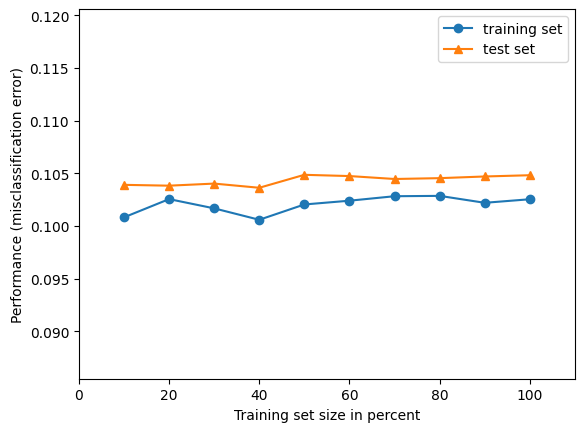

In [39]:
from mlxtend.plotting import plot_learning_curves
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV, RidgeClassifier, ElasticNet

RIDGEclassifier = RidgeClassifier(alpha=10)
RICmodel = RIDGEclassifier.fit(X_train, y_train)
RICpreds = RICmodel.predict(X_test)
print("Accuracy RIDGE Classifier:", accuracy_score(y_test, RICpreds) *100)
RICmodel.coef_
RICmodel.intercept_
r_sq_rc = RICmodel.score(X_train, y_train)
print(r_sq_rc)
plot_learning_curves(X_train=X_train,y_train=y_train,X_test=X_test,y_test=y_test,clf=RIDGEclassifier,scoring="misclassification error",print_model=False)
plt.show()

#### Random Forest Classifier

In [40]:
RFclassifier = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=23, oob_score=True)
RFmodel = RFclassifier.fit(X_train, y_train)
RFpreds = RFmodel.predict(X_test)
print("Accuracy Random Forest:", accuracy_score(y_test, RFpreds) *100)

Accuracy Random Forest: 95.92379440365151


##### Gaussian Naive Bayes

In [41]:
GNBclassifier = GaussianNB()
GNBmodel = GNBclassifier.fit(X_train, y_train)
GNBpreds = GNBmodel.predict(X_test)
print("Accuracy Gaussian NB:", accuracy_score(y_test, GNBpreds) *100)

Accuracy Gaussian NB: 87.57690017860686


### Cross Validation of All Attempted Models

In [42]:
from sklearn.model_selection import cross_validate

In [43]:
cv_results_knn = cross_validate(KNNclassifier, X_train, y_train, cv=5, return_estimator=True)
best_knn = cv_results_knn['test_score'].argmax()
print("Best cross validation score of KNN =", cv_results_knn['test_score'][best_knn]*100)
print("Test Data Accuracy of KNN =", (accuracy_score(y_test, KNNclassifier.predict(X_test))) *100)

Best cross validation score of KNN = 99.03750744195277
Test Data Accuracy of KNN = 99.05536812859694


KNN is confirmed to be overfitting on this model, so moving on to other classifiers . . .

In [44]:
cv_results_dt = cross_validate(DTclassifier, X_train, y_train, cv=5, return_estimator=True)
best_dt = cv_results_dt['test_score'].argmax()
print("Best cross validation score of DT =" , cv_results_dt['test_score'][best_dt]*100)
print("Test Data Accuracy of DT =", (accuracy_score(y_test, DTclassifier.predict(X_test))) *100)

Best cross validation score of DT = 95.92160754155297
Test Data Accuracy of DT = 95.68168287358603


In [45]:
cv_results_lda = cross_validate(LDAmodel, X_train, y_train, cv=5, return_estimator=True)
best_lda = cv_results_lda['test_score'].argmax()
print("Best cross validation score of LDA =", cv_results_lda['test_score'][best_lda]*100)
print("Test Data Accuracy of LDA =", (accuracy_score(y_test, LDAmodel.predict(X_test))) *100)

Best cross validation score of LDA = 90.02778329033538
Test Data Accuracy of LDA = 89.52173050208376


In [50]:
cv_results_qda = cross_validate(QDAmodel, X_train, y_train, cv=5, return_estimator=True)
best_qda = cv_results_qda['test_score'].argmax()
print("Best cross validation score of QDA =", cv_results_qda['test_score'][best_qda]*100)
print("Test Data Accuracy of QDA =", (accuracy_score(y_test, QDAmodel.predict(X_test))) *100)

Best cross validation score of QDA = 88.46001190712443
Test Data Accuracy of QDA = 88.08493748759675


In [47]:
cv_results_svm = cross_validate(SVM_model, X_train, y_train, cv=5, return_estimator=True)
best_svm = cv_results_svm['test_score'].argmax()
print("Best cross validation score of SVM =", cv_results_svm['test_score'][best_svm]*100)
print("Test Data Accuracy of SVM =", (accuracy_score(y_test, SVM_model.predict(X_test))) *100)

Best cross validation score of SVM = 90.33042270291725
Test Data Accuracy of SVM = 89.7955943639611


In [48]:
cv_results_rf = cross_validate(RFmodel, X_train, y_train, cv=5, return_estimator=True)
best_rf = cv_results_rf['test_score'].argmax()
print("Best cross validation score of Random Forest=", cv_results_rf['test_score'][best_rf]*100)
print("Test Data Accuracy of Random Forest =", (accuracy_score(y_test, RFmodel.predict(X_test))) *100)

Best cross validation score of Random Forest= 96.16968494170182
Test Data Accuracy of Random Forest = 95.92379440365151


In [51]:
cv_results_ric = cross_validate(RICmodel, X_train, y_train, cv=5, return_estimator=True)
best_ric = cv_results_ric['test_score'].argmax()
print("Best cross validation score of Ridge Classifier=", cv_results_ric['test_score'][best_ric]*100)
print("Test Data Accuracy of Ridge Classifier =", (accuracy_score(y_test, RICmodel.predict(X_test))) *100)

Best cross validation score of Ridge Classifier= 90.03770589402659
Test Data Accuracy of Ridge Classifier = 89.51776146060726


### Compiling all Results

In [53]:
# Define your models
models = {
    'K-Nearest Neighbours': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(), 
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Support Vector Machines': SVC(), 
    'Random Forest Classifier': RandomForestClassifier(), 
    'Ridge Classifier': RidgeClassifier()
    # Add more models as needed
}

# Initialize an empty list to store results
results = []

# Evaluate and store results for each model
for model_name, model in models.items():
    # Cross-validate the model
    cv_results = cross_validate(model, X_train, y_train, cv=5, return_estimator=True)
    
    # Find the index of the best cross-validation score
    best_index = cv_results['test_score'].argmax()
    
    # Extract the best model and its score
    best_model = cv_results['estimator'][best_index]
    best_score = cv_results['test_score'][best_index] * 100
    
    # Test the best model on the test set
    test_accuracy = accuracy_score(y_test, best_model.predict(X_test)) * 100
    
    # Append results to the list
    results.append({
        'Model': model_name,
        'Cross Validation Score': best_score,
        'Test Accuracy': test_accuracy
    })

# Create a DataFrame from the list
results_df = pd.DataFrame(results)

# Print the results
results_df.head(8)

,Model,Cross Validation Score,Test Accuracy
0,K-Nearest Neighbours,99.037507,99.047430
1,Decision Tree,98.878690,98.841040
2,Linear Discriminant Analysis,90.027783,89.489978
3,Quadratic Discriminant Analysis,88.460012,88.188133
4,Support Vector Machines,94.726136,94.447311
5,Random Forest Classifier,99.146656,99.122842
6,Ridge Classifier,90.032745,89.489978


##### **Model Evaluations** 
**Best Models**
- **SVM**:
- **Ridge Classifier**:
- **LDA**:

**Satisfactory Models** 
- **QDA**:

**Overfit Models**
- **KNN**:
- **Random Forest Classifier**:
- **Decision Tree**:

The overfitting of KNN, DT and Random Forest might imply that they have generalized poorly on test data because of the complexity and noise within the PCA data. 

LDA, QDA and Ridge Classifier have performed well without overfitting on the data. However LDA and Ridge Classifier should've ideally been above 90% for them to be considered a good fit. 

Because this dataset requires high accuracy, SVM has performed most optimally for sensitive data like security-classification. This might be because it has been able to generalize well by interpreting non-linear relationships and finding appropriate decision boundaries between the data points. 

